In [ ]:
import numpy as np

In [ ]:

# 1. Sigmoid Function

def logistic_function(x):
    """
    Computes the logistic function applied to any value of x.
    Arguments:
    x: scalar or numpy array of any size.
    Returns:
    y: logistic function applied to x.
    """
    y = 1 / (1 + np.exp(-x))  # Implemented sigmoid function
    return y

# Test sigmoid function
def test_logistic_function():
    """
    Test cases for the logistic_function.
    """
    # Test with scalar input
    x_scalar = 0
    expected_output_scalar = round(1 / (1 + np.exp(0)), 3) # Expected output: 0.5
    assert round(logistic_function(x_scalar), 3) == expected_output_scalar, "Test failed for scalar input"
    # Test with positive scalar input
    x_pos = 2
    expected_output_pos = round(1 / (1 + np.exp(-2)), 3) # Expected output: ~0.881
    assert round(logistic_function(x_pos), 3) == expected_output_pos, "Test failed for positive scalar input"
    # Test with negative scalar input
    x_neg = -3
    expected_output_neg = round(1 / (1 + np.exp(3)), 3) # Expected output: ~0.047
    assert round(logistic_function(x_neg), 3) == expected_output_neg, "Test failed for negative scalar input"
    # Test with numpy array input
    x_array = np.array([0, 2, -3])
    expected_output_array = np.array([0.5, 0.881, 0.047]) # Adjusted expected values rounded to 3 decimals
    assert np.all(np.round(logistic_function(x_array), 3) == expected_output_array), "Test failed for numpy array input"
    print("All tests passed!")

# Run the test case
test_logistic_function()


All tests passed!


In [ ]:

# 2. Log-Loss Function

def log_loss(y_true, y_pred):
    """
    Computes log loss for true target value y ={0 or 1} and predicted target value y’ in between {0-1}.
    Arguments:
    y_true (scalar): true target value {0 or 1}.
    y_pred (scalar): predicted target value {0-1}.
    Returns:
    loss (float): loss/error value
    """
    import numpy as np
    # Ensure y_pred is clipped to avoid log(0)
    y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)
    loss = -y_true * np.log(y_pred) - (1 - y_true) * np.log(1 - y_pred)  # Implemented log-loss
    return loss

# Test log-loss
def test_log_loss():
    """
    Test cases for the log_loss function.
    """
    import numpy as np
    # Partially correct prediction
    y_true, y_pred = 1, 0.8
    expected_loss = -(1 * np.log(0.8)) - (0 * np.log(0.2))  # ~0.2231
    assert np.isclose(log_loss(y_true, y_pred), expected_loss, atol=1e-6), "Test failed for partially correct prediction"

    y_true, y_pred = 0, 0.2
    expected_loss = -(0 * np.log(0.2)) - (1 * np.log(0.8))  # ~0.2231
    assert np.isclose(log_loss(y_true, y_pred), expected_loss, atol=1e-6), "Test failed for partially correct prediction"
    print("All log-loss tests passed!")

test_log_loss()


All log-loss tests passed!


In [ ]:

# 3. Cost Function
def cost_function(y_true, y_pred):
    """
    Computes log loss for inputs true value (0 or 1) and predicted value (between 0 and 1)
    Args:
    y_true (array_like, shape (n,)): array of true values (0 or 1)
    y_pred (array_like, shape (n,)): array of predicted values (probability of y_pred being 1)
    Returns:
    cost (float): nonnegative cost corresponding to y_true and y_pred
    """
    assert len(y_true) == len(y_pred), "Length of true values and length of predicted values do not match"
    n = len(y_true)  # number of observations
    loss_vec = log_loss(y_true, y_pred)  # vectorized log-loss
    cost = np.mean(loss_vec)  # average over all observations
    return cost

# Test cost function
def test_cost_function():
    import numpy as np
    y_true = np.array([1, 0, 1])
    y_pred = np.array([0.9, 0.1, 0.8])
    expected_cost = np.mean([-np.log(0.9), -np.log(0.9), -np.log(0.8)])
    result = cost_function(y_true, y_pred)
    assert np.isclose(result, expected_cost, atol=1e-6), f"Test failed: {result} != {expected_cost}"
    print("Cost function test passed!")

test_cost_function()


Cost function test passed!


In [ ]:

# 4. Logistic Regression Cost Function (Vectorized)

def costfunction_logreg(X, y, w, b):
    """
    Computes the cost function, given data and model parameters.
    Args:
    X (ndarray, shape (m,n)): data on features, m observations with n features.
    y (array_like, shape (m,)): array of true values of target (0 or 1).
    w (array_like, shape (n,)): weight parameters of the model.
    b (float): bias parameter of the model.
    Returns:
    cost (float): nonnegative cost corresponding to y and y_pred.
    """
    n, d = X.shape
    assert len(y) == n, "Number of feature observations and number of target observations do not match."
    assert len(w) == d, "Number of features and number of weight parameters do not match."

    z = np.dot(X, w) + b  # Compute z using np.dot
    y_pred = logistic_function(z)  # Compute predictions using sigmoid
    cost = cost_function(y, y_pred)  # Compute the cost using the cost function
    return cost

# Testing the Function:
X, y, w, b = np.array([[10, 20], [-10, 10]]), np.array([1, 0]), np.array([0.5, 1.5]), 1
print(f"Cost for logistic regression(X = {X}, y = {y}, w = {w}, b = {b}) = {costfunction_logreg(X, y, w, b)}")


Cost for logistic regression(X = [[ 10  20]
 [-10  10]], y = [1 0], w = [0.5 1.5], b = 1) = 5.500008350834906


In [ ]:

# 5. Compute Gradient

def compute_gradient(X, y, w, b):
    """
    Computes gradients of the cost function with respect to model parameters.
    Args:
    X (ndarray, shape (n,d)): Input data, n observations with d features
    y (array_like, shape (n,)): True labels (0 or 1)
    w (array_like, shape (d,)): Weight parameters of the model
    b (float): Bias parameter of the model
    Returns:
    grad_w (array_like, shape (d,)): Gradients of the cost function with respect to the weight parameters
    grad_b (float): Gradient of the cost function with respect to the bias parameter
    """
    n, d = X.shape
    assert len(y) == n, f"Expected y to have {n} elements, but got {len(y)}"
    assert len(w) == d, f"Expected w to have {d} elements, but got {len(w)}"

    z = np.dot(X, w) + b  # Linear combination
    y_pred = logistic_function(z)  # Predictions

    grad_w = -(1/n) * np.dot((y - y_pred), X)  # Gradient w.r.t weights
    grad_b = -(1/n) * np.sum(y - y_pred)       # Gradient w.r.t bias
    return grad_w, grad_b

# Simple test
X = np.array([[10, 20], [-10, 10]])
y = np.array([1, 0])
w = np.array([0.5, 1.5])
b = 1

grad_w, grad_b = compute_gradient(X, y, w, b)
print("Gradients computed successfully.")
print(f"grad_w: {grad_w}")
print(f"grad_b: {grad_b}")


Gradients computed successfully.
grad_w: [-4.99991649  4.99991649]
grad_b: 0.4999916492890759


In [ ]:

# 6. Gradient Descent

def gradient_descent(X, y, w, b, alpha, n_iter, show_cost=False, show_params=True):
    """
    Implements batch gradient descent to optimize logistic regression parameters.
    Args:
    X (ndarray, shape (n,d)): Data on features, n observations with d features
    y (array_like, shape (n,)): True values of target (0 or 1)
    w (array_like, shape (d,)): Initial weight parameters
    b (float): Initial bias parameter
    alpha (float): Learning rate
    n_iter (int): Number of iterations
    show_cost (bool): If True, displays cost every 100 iterations
    show_params (bool): If True, displays parameters every 100 iterations
    Returns:
    w (array_like, shape (d,)): Optimized weight parameters
    b (float): Optimized bias parameter
    cost_history (list): List of cost values over iterations
    params_history (list): List of parameters (w, b) over iterations
    """
    n, d = X.shape
    assert len(y) == n, "Number of observations in X and y do not match"
    assert len(w) == d, "Number of features in X and w do not match"

    cost_history = []
    params_history = []

    for i in range(n_iter):
        grad_w, grad_b = compute_gradient(X, y, w, b)  # Compute gradients
        w -= alpha * grad_w  # Update weights
        b -= alpha * grad_b  # Update bias
        cost = costfunction_logreg(X, y, w, b)  # Compute cost

        cost_history.append(cost)
        params_history.append((w.copy(), b))

        if show_cost and (i % 100 == 0 or i == n_iter - 1):
            print(f"Iteration {i}: Cost = {cost:.6f}")
        if show_params and (i % 100 == 0 or i == n_iter - 1):
            print(f"Iteration {i}: w = {w}, b = {b:.6f}")

    return w, b, cost_history, params_history

# Test Gradient Descent
X = np.array([[0.1, 0.2], [-0.1, 0.1]])
y = np.array([1, 0])
w = np.zeros(X.shape[1])
b = 0.0
alpha = 0.1
n_iter = 10000

w_out, b_out, cost_history, params_history = gradient_descent(X, y, w, b, alpha, n_iter)
print(f"Final weights: {w_out}, Final bias: {b_out}")




Iteration 0: w = [0.005  0.0025], b = 0.000000
Iteration 100: w = [0.49720864 0.24508648], b = -0.023452
Iteration 200: w = [0.97434603 0.47849256], b = -0.057870
Iteration 300: w = [1.43691991 0.70464601], b = -0.092093
Iteration 400: w = [1.88543471 0.92391902], b = -0.125322
Iteration 500: w = [2.32039437 1.13656701], b = -0.157535
Iteration 600: w = [2.74229907 1.34283486], b = -0.188764
Iteration 700: w = [3.15164227 1.54296355], b = -0.219051
Iteration 800: w = [3.54890812 1.73718949], b = -0.248430
Iteration 900: w = [3.93456948 1.9257436 ], b = -0.276941
Iteration 1000: w = [4.30908633 2.10885056], b = -0.304617
Iteration 1100: w = [4.67290462 2.28672821], b = -0.331494
Iteration 1200: w = [5.02645542 2.45958711], b = -0.357604
Iteration 1300: w = [5.37015436 2.62763033], b = -0.382979
Iteration 1400: w = [5.70440133 2.79105324], b = -0.407649
Iteration 1500: w = [6.02958037 2.9500435 ], b = -0.431645
Iteration 1600: w = [6.34605971 3.10478102], b = -0.454992
Iteration 1700: w 

In [ ]:
# Simple assertion test for gradient_descent
def test_gradient_descent():
  X = np.array([[0.1, 0.2], [-0.1, 0.1]]) # Shape (2, 2)
  y = np.array([1, 0]) # Shape (2,)
  w = np.zeros(X.shape[1]) # Shape (2,)
  b = 0.0 # Scalar
  alpha = 0.1 # Learning rate
  n_iter = 100 # Number of iterations
  # Run gradient descent
  w_out, b_out, cost_history, _ = gradient_descent(X, y, w, b, alpha, n_iter, show_cost=False,
  show_params=False)
  # Assertions
  assert len(cost_history) == n_iter, "Cost history length does not match the number of iterations"
  assert w_out.shape == w.shape, "Shape of output weights does not match the initial weights"
  assert isinstance(b_out, float), "Bias output is not a float"
  assert cost_history[-1] < cost_history[0], "Cost did not decrease over iterations"
  print("All tests passed!")
# Run the test
test_gradient_descent()

All tests passed!


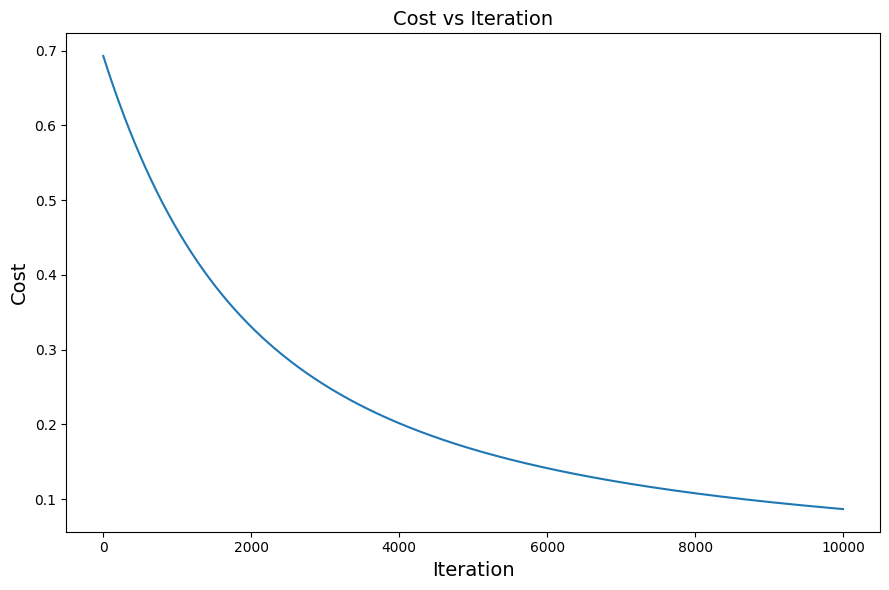

In [ ]:
import matplotlib.pyplot as plt

# Plotting cost over iteration
plt.figure(figsize = (9, 6))
plt.plot(cost_history)
plt.xlabel("Iteration", fontsize = 14)
plt.ylabel("Cost", fontsize = 14)
plt.title("Cost vs Iteration", fontsize = 14)
plt.tight_layout()
plt.show()

In [ ]:

# 7. Prediction Function

def prediction(X, w, b, threshold=0.5):
    """
    Predicts binary outcomes for given input features based on logistic regression parameters.
    Arguments:
    X (ndarray, shape (n,d)): Array of test independent variables (features)
    w (ndarray, shape (d,)): Array of weights learned via gradient descent.
    b (float): Bias learned via gradient descent.
    threshold (float, optional): Classification threshold for predicting class labels. Default is 0.5.
    Returns:
    y_pred (ndarray, shape (n,)): Array of predicted dependent variable (binary class labels: 0 or 1).
    """
    y_test_prob = logistic_function(np.dot(X, w) + b)  # Compute predicted probabilities
    y_pred = (y_test_prob >= threshold).astype(int)    # Apply threshold for classification
    return y_pred

# Test prediction function
def test_prediction():
    X_test = np.array([[0.5, 1.0], [1.5, -0.5], [-0.5, -1.0]])
    w_test = np.array([1.0, -1.0])
    b_test = 0.0
    threshold = 0.5
    expected_output = np.array([0, 1, 1])
    y_pred = prediction(X_test, w_test, b_test, threshold)
    assert np.array_equal(y_pred, expected_output), f"Expected {expected_output}, but got {y_pred}"
    print("Prediction test passed!")

test_prediction()


Prediction test passed!


In [ ]:

# 8. Evaluate Classification

def evaluate_classification(y_true, y_pred):
    """
    Computes the confusion matrix, precision, recall, and F1-score for binary classification.
    Arguments:
    y_true (ndarray, shape (n,)): Ground truth binary labels (0 or 1).
    y_pred (ndarray, shape (n,)): Predicted binary labels (0 or 1).
    Returns:
    metrics (dict): A dictionary containing confusion matrix, precision, recall, and F1-score.
    """
    TP = np.sum((y_true == 1) & (y_pred == 1))  # True Positives
    TN = np.sum((y_true == 0) & (y_pred == 0))  # True Negatives
    FP = np.sum((y_true == 0) & (y_pred == 1))  # False Positives
    FN = np.sum((y_true == 1) & (y_pred == 0))  # False Negatives

    confusion_matrix = np.array([[TN, FP],
                                 [FN, TP]])

    precision = TP / (TP + FP) if (TP + FP) > 0 else 0.0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0.0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0.0

    metrics = {
        "confusion_matrix": confusion_matrix,
        "precision": precision,
        "recall": recall,
        "f1_score": f1_score
    }

    return metrics

# Test evaluation
y_true_test = np.array([1, 0, 1, 0])
y_pred_test = np.array([1, 0, 0, 0])
metrics = evaluate_classification(y_true_test, y_pred_test)
print("Evaluation metrics:", metrics)


Evaluation metrics: {'confusion_matrix': array([[2, 0],
       [1, 1]]), 'precision': np.float64(1.0), 'recall': np.float64(0.5), 'f1_score': np.float64(0.6666666666666666)}
